# What is unsupervised learning?

- A group of machine learning techniques that identify patterns in data without pre-existing labels or categories.
- The goal is to discover the underlying structure of the data.
- Common methods include clustering (e.g., K-means, hierarchical clustering) and dimensionality reduction (e.g., PCA, t-SNE).


## Clustering

- The process of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups (clusters).
- Common clustering algorithms:
  - K-means Clustering
  - Hierarchical Clustering
  - DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- Example: Distance between points on a 2D plane


In [2]:
#Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

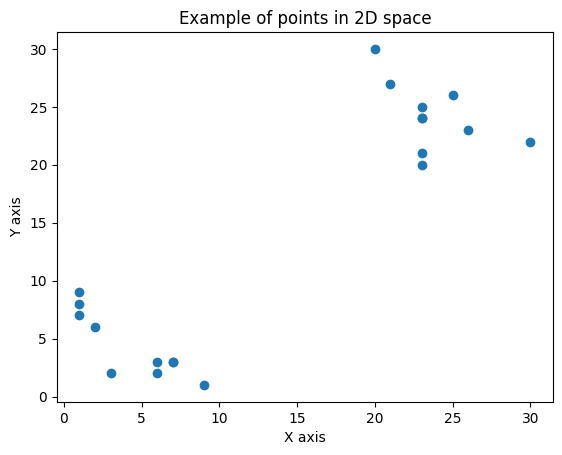

In [4]:
example_x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
example_y = [1, 3, 6, 2, 7, 3, 8, 2, 9, 3, 25, 23, 26, 21, 27, 24, 20, 30, 22, 24]
plt.scatter(example_x, example_y)
plt.title("Example of points in 2D space")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

## What is Cluster?

- A group of items with similar characteristics or features.
- In data analysis, clusters are formed based on the similarity or distance between data points.


## How it clusters data points in 2D space?

**First**:
It will consider each point as a separate cluster.


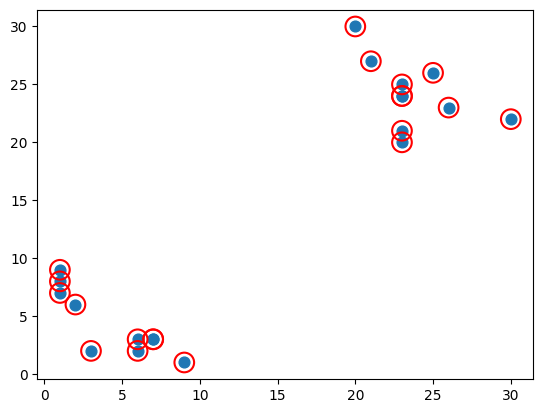

In [13]:
# main points
plt.scatter(example_x, example_y, s=60)

# outline circles
plt.scatter(example_x, example_y, s=200, facecolors='none', edgecolors='red', linewidths=1.5)

plt.show()

**Then**:
It will calculate the distance between each pair of clusters and merge the closest two clusters until it stops to n_clusters.


In [21]:
from scipy.cluster.hierarchy import linkage, fcluster 
import pandas as pd

In [24]:
df = pd.DataFrame({'X': example_x, 'Y': example_y})

In [27]:
Z = linkage(df, method='ward')
df['cluster'] = fcluster(Z, t=2, criterion='maxclust')

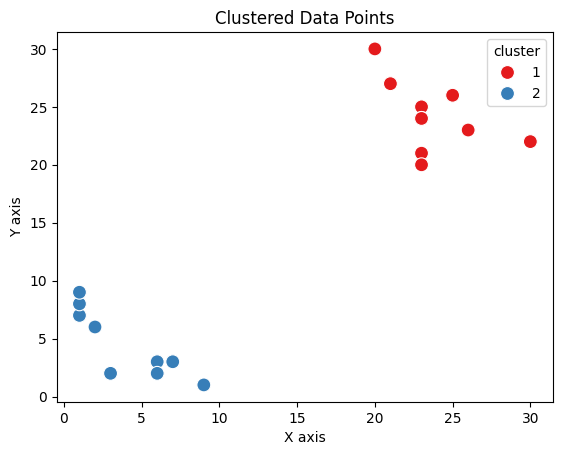

In [28]:
sns.scatterplot(data=df, x='X', y='Y', hue='cluster', palette='Set1', s=100)
plt.title("Clustered Data Points")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

# Preparing Data for Clustering


In [84]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline


In [85]:
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [86]:
penguins_df['sex'] = penguins_df['sex'].apply(lambda x: 0 if x=="FEMALE" else 1)
penguins_df['sex'].unique()

array([1, 0])

# Hierarchical Clustering

## Creating a distance matrix using linkage

```python
from scipy.cluster.hierarchy import linkage, fcluster
linkage(observation,method,metric,optimal_ordering)
```

- `method`: How to calculate the proximity of clusters (e.g., 'ward', 'single', 'complete', 'average').
  - `single`: decides the distance between two clusters as the minimum distance between points in the two clusters.
  - `complete`: decides the distance between two clusters as the maximum distance between points in the two clusters.
  - `average`: decides the distance between two clusters as the mean arithmetic distance between points in the two clusters.
  - `ward`: minimizes the total within-cluster variance.
  - `median`: uses the median of the distances between points in the two clusters.
- `metric`: It decides the distance metric to use (e.g., 'euclidean', 'cityblock', 'cosine').
- `optimal_ordering`: If True, the linkage matrix will be reordered to minimize the distance between successive leaves.

## Create cluster labels with fcluster

```python
fcluster(linkage_matrix, t, criterion)
```

- `linkage_matrix`: The hierarchical clustering encoded as a linkage matrix.
- `t`: The threshold to apply when forming flat clusters.
- `criterion`: How to decide thresholds from clusters


In [97]:
scalled_df = StandardScaler().fit_transform(penguins_df)


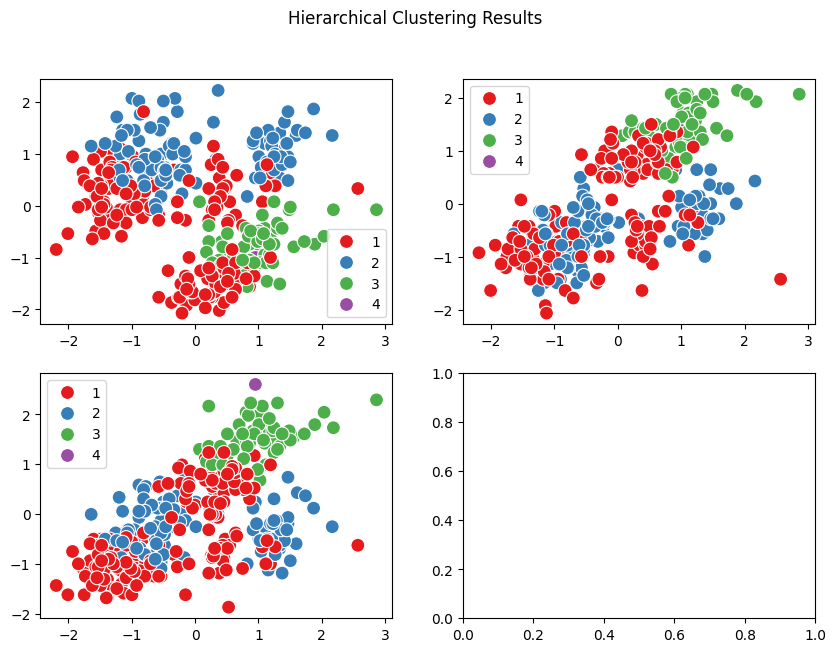

In [102]:
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(scalled_df, method = 'single', metric = 'euclidean')

# Assign cluster labels
labels = fcluster(distance_matrix, t=4, criterion='maxclust')
fig, ax = plt.subplots(2, 2, figsize=(10, 7))  # Create a 2x2 grid of subplots
# Plot clusters
sns.scatterplot(x=scalled_df[:, 0], y=scalled_df[:, 1], 
                hue=labels, palette='Set1', s=100, ax=ax[0, 0])
sns.scatterplot(x=scalled_df[:, 0], y=scalled_df[:, 2], 
                hue=labels, palette='Set1', s=100, ax=ax[0, 1])
sns.scatterplot(x=scalled_df[:, 0], y=scalled_df[:, 3], 
                hue=labels, palette='Set1', s=100, ax=ax[1, 0])
plt.suptitle("Hierarchical Clustering Results") 


plt.show()

## How many clusters

- Dendogram help us showing progressions as clusters are merged
- A dendrogram is a branching diagram that demonstrates how each cluster is composed by branching out into its child nodes


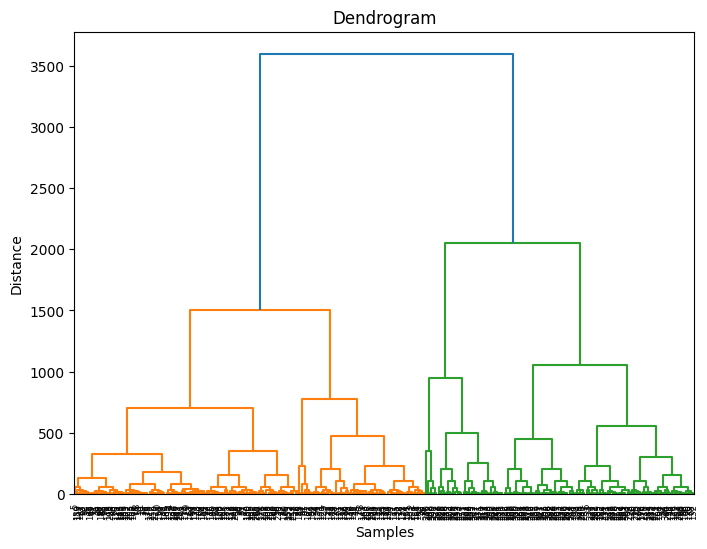

In [88]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(8, 6))
mergings = linkage(penguins_df, method='complete')
dendrogram(mergings,leaf_rotation=90, leaf_font_size=6)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

> The width of an inverted U shape represents the distance between the two child clusters. A wider U, therefore, means that the two child clusters were farther away from each other as compared to a narrower U in the diagram.


# K-Means clustering

- K-means clustering is a popular unsupervised machine learning algorithm used to partition a dataset into K distinct clusters based on feature similarity.
- The algorithm works by initializing K centroids, assigning each data point to the nearest centroid, and then updating the centroids based on the mean of the assigned points. This process is repeated iter

```python
kmeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
```

- `n_clusters`: int, default=8
  The number of clusters to form as well as the number of centroids to generate.

- `init`: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'
  Method for initialization:

  - 'k-means++': Selects initial cluster centroids using sampling based on an empirical probability distribution.
  - 'random': Chooses n_clusters observations at random from data for the initial centroids.

- `n_init`: 'auto' or int, default='auto'
  Number of times the k-means algorithm is run with different centroid seeds.

- `max_iter`: int, default=300
  Maximum number of iterations of the k-means algorithm for a single run.

- `tol`: float, default=1e-4
  Relative tolerance to declare convergence.

- `verbose`: int, default=0
  Verbosity mode.

- `random_state`: int, RandomState instance or None, default=None
  Determines random number generation for centroid initialization.

- `copy_x`: bool, default=True
  If True, the original data is not modified.

- `algorithm`: {"lloyd", "elkan"}, default="lloyd"
  K-means algorithm to use.


**First**: Elbow Method to find optimal K


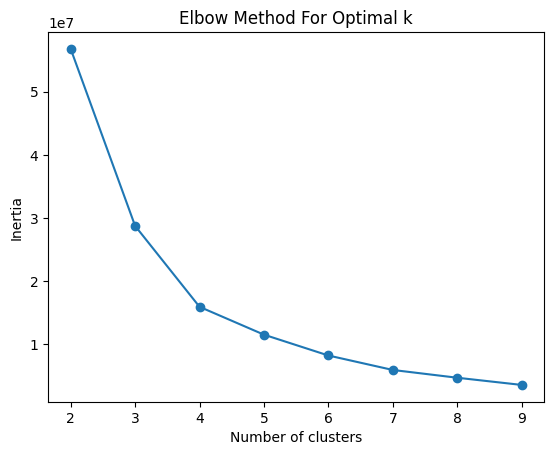

In [103]:
interias = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    interia = kmeans.fit(penguins_df).inertia_
    interias.append(interia)
plt.plot(range(2,10), interias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Best K is at the "elbow" point where inertia starts to decrease more slowly and it is 4


In [105]:
scalar = StandardScaler()
kmeans = KMeans(n_clusters=4,random_state=42)
pipeline = make_pipeline(scalar,kmeans)

In [106]:
pipeline.fit(penguins_df)
labels = pipeline.predict(penguins_df)

In [107]:
penguins_df['label'] = kmeans.labels_

In [108]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984


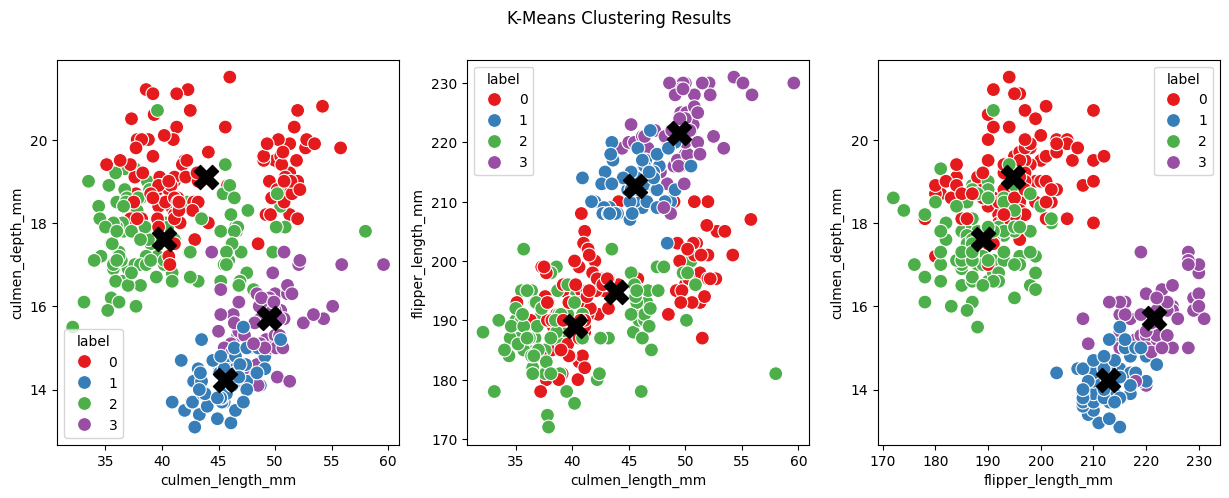

In [111]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='culmen_depth_mm', hue='label', palette='Set1', s=100, ax=ax[0])
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='flipper_length_mm', hue='label', palette='Set1', s=100, ax=ax[1])
sns.scatterplot(data=penguins_df, x='flipper_length_mm', y='culmen_depth_mm', hue='label', palette='Set1', s=100, ax=ax[2])
# Centroids
centroids = pipeline.named_steps['kmeans'].cluster_centers_
centroids = scalar.inverse_transform(centroids)
for i, centroid in enumerate(centroids):
    ax[0].scatter(centroid[0], centroid[1], s=300, c='black', marker='X')
    ax[1].scatter(centroid[0], centroid[2], s=300, c='black', marker='X')
    ax[2].scatter(centroid[2], centroid[1], s=300, c='black', marker='X')

plt.suptitle("K-Means Clustering Results")
plt.show()